# Resonator Coupling

---

### 0.1 Prerequisite

- When changing the python class in the lib directory please restart kernel.
- When launching the jupyter notebook please always firstly run this cell.

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import constants
import scipy.sparse.linalg
import scipy.sparse as sparse
import qutip.settings as settings
from tqdm import tqdm
import qutip as qt

qt.settings.atol = 1e-100
qt.settings.auto_tidyup_atol = qt.settings.atol

current_dir = os.getcwd()
# Get the parent folder path
parent_dir = os.path.dirname(current_dir)
# Add the parent folder path to sys.path
sys.path.append(parent_dir)

from lib.qubit import qubit
from lib.circuit_res_coupling import circuit_res

# plt.style.use("Solarize_Light2")
# plt.style.use('dark_background')
# plt.style.use('seaborn-whitegrid')
thememap = 'viridis'

# Setting up constants
h = constants.h
hbar = constants.hbar
pi = np.pi

---

The system is composed of two Transmon coupled by a resonator. The nodes are defined as the graph below :

![circuit](..\img\circuit.png)

#### Table of content :
   1) Visualization of the Hamiltonian
   2) Variation of the coupling J and forth order calculation from litterature

## 1 Visualization of the Hamiltonian

In [2]:
# Initialize transmon

# Circuit constant
ng = 0.5
Cc1 = 18e-15
Cc2 = 18e-15

Ej_p = 18.2e9
Ej_t = 11.8e9
Cp = 270e-15
Ct = 250e-15
ncut_p = 10
ncut_t = 10

L_res = 3.5e-9
C_res = 10e-15
m_cut = 10

# Creation of circuit object
system_10 = circuit_res([Cc1, Cc2], C_res, L_res, m_cut, [qubit(Ej_p, [Cp], ng, ncut_p), qubit(Ej_t, [Ct], ng, ncut_t)])

system_10.print_params()


Probe ------------------
Ej:    18.200000000000003 GHz
Ec:    0.2869663603653203 GHz
Cj:    270.0 fF
Ej/Ec : 63.42206792751119
w_01:    6.162432921919607 GHz
ng:    0.5
Target ------------------
Ej:    11.799999999999999 GHz
Ec:    0.309923669194546 GHz
Cj:    250.0 fF
Ej/Ec : 38.073891002474156
w_01:    5.077795771645749 GHz
ng:    0.5
Resonator ------------------
wr:    26.90209546303806 Ghz
Cc1:    18.0 fF
Cc2:    18.0 fF
Cr:    10.0 fF
Lr:    3.5 nH
Z0:    591.6079783099616 Ohm


MemoryError: Unable to allocate 14.5 GiB for an array with shape (44100, 44100) and data type float64

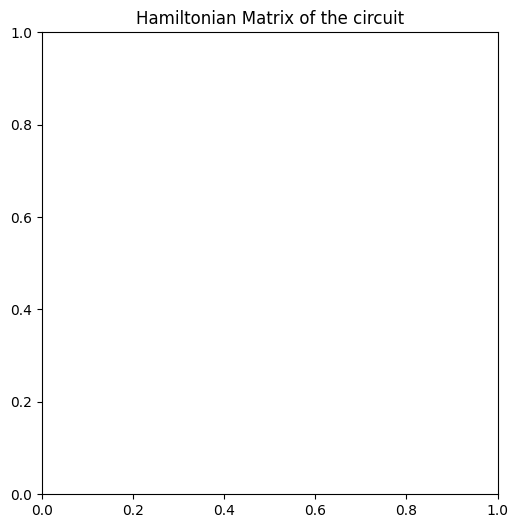

In [3]:
# Exctracting the Hamiltonian
H_circ = system_10.get_H_circuit()
H_p = system_10.get_H_probe()
H_t = system_10.get_H_target()
H_res = system_10.get_H_resonator()

f = plt.figure(figsize=(20,6))

# Plotting the Hamiltonian
ax1 = f.add_subplot(131)
ax1.title.set_text('Hamiltonian Matrix of the circuit')
im1 = ax1.imshow(np.absolute(H_circ.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(132)
ax2.title.set_text('Hamiltonian of Probe Qubit')
im2 = ax2.imshow(np.absolute(H_p.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im2)


ax3 = f.add_subplot(133)
ax3.title.set_text('Hamiltonian of target Qubit')
im3 = ax3.imshow(np.absolute(H_t.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im3)

# ax4 = f.add_subplot(134)
# ax4.title.set_text('Hamiltonian of resonator')
# im4 = ax4.imshow(np.real(H_res), cmap=plt.get_cmap(thememap))
# f.colorbar(im4)

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
# ax4.grid(False)

plt.show()

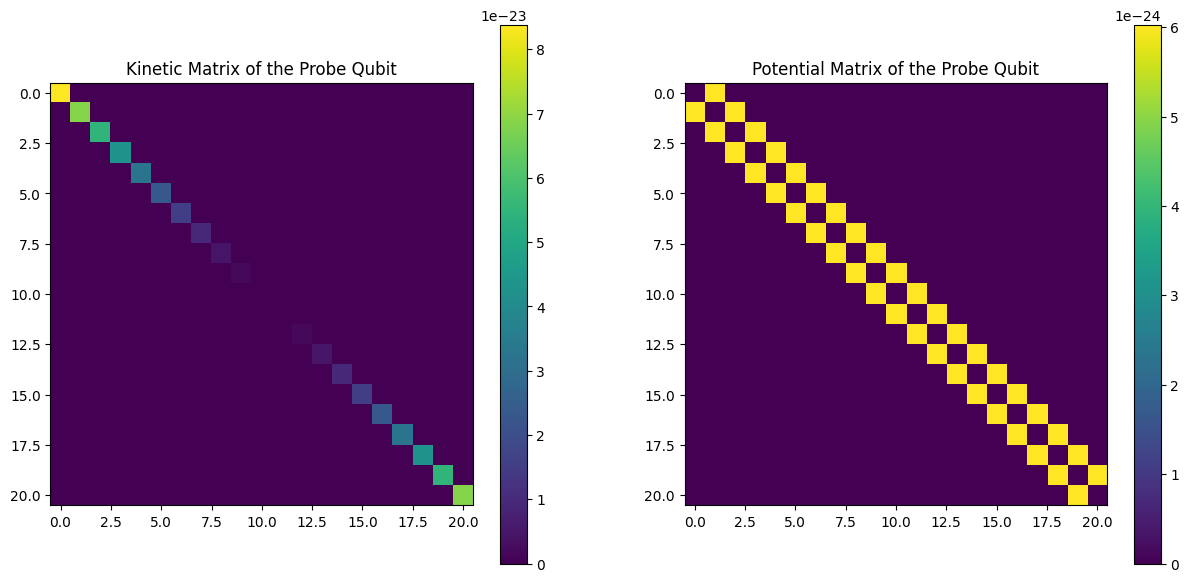

In [4]:
kin_probe = system_10.get_kinetic_probe()
pot_probe = system_10.get_potential_probe()

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Kinetic Matrix of the Probe Qubit')
im1 = ax1.imshow(np.absolute(kin_probe.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(122)
ax2.title.set_text('Potential Matrix of the Probe Qubit')
im2 = ax2.imshow(np.absolute(pot_probe.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im2)

ax1.grid(False)
ax2.grid(False)

plt.show()

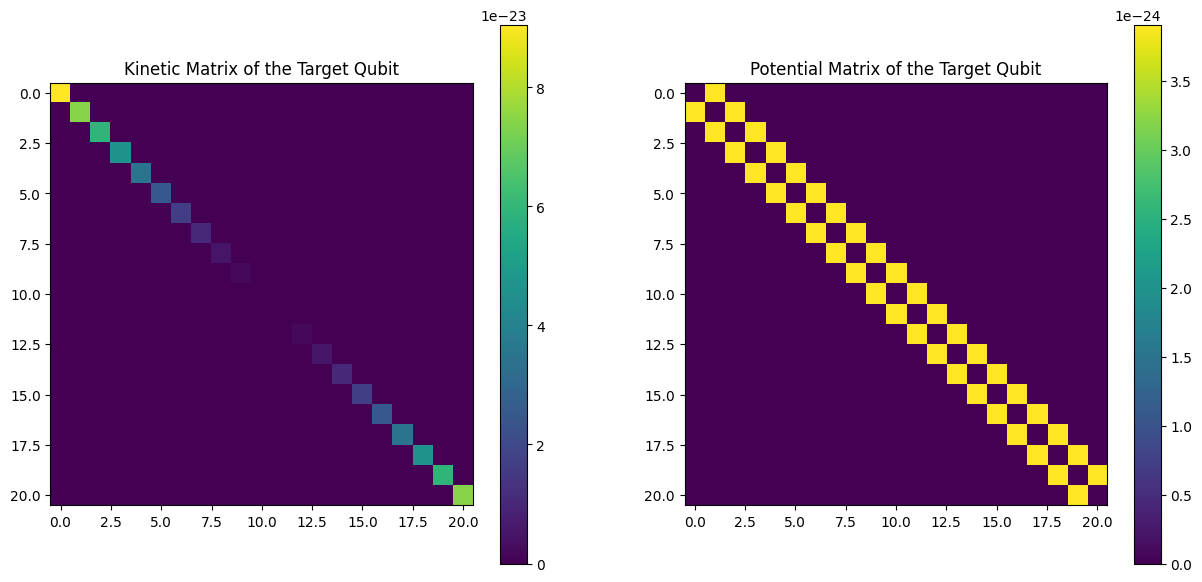

In [5]:
kin_target = system_10.get_kinetic_target()
pot_target = system_10.get_potential_target()

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Kinetic Matrix of the Target Qubit')
im1 = ax1.imshow(np.absolute(kin_target.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(122)
ax2.title.set_text('Potential Matrix of the Target Qubit')
im2 = ax2.imshow(np.absolute(pot_target.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im2)
ax1.grid(False)
ax2.grid(False)
plt.show()

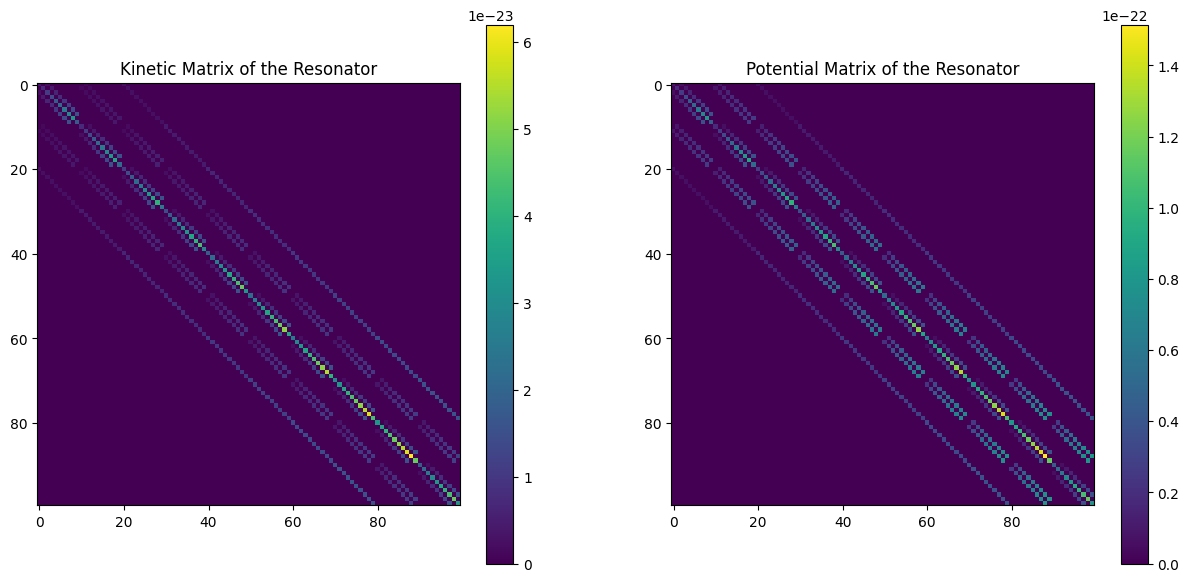

In [6]:
kin_target = system_10.get_kinetic_resonator()
pot_target = system_10.get_potential_resonator()

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Kinetic Matrix of the Resonator')
im1 = ax1.imshow(np.absolute(kin_target.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(122)
ax2.title.set_text('Potential Matrix of the Resonator')
im2 = ax2.imshow(np.absolute(pot_target.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im2)
ax1.grid(False)
ax2.grid(False)
plt.show()

## 2 Calculate Interaction

### 2.1 Static visualization

The Hamiltonian according to perturbation theory has a longitudinal coupling between the two transmons for a far detuned resonator. The Hamiltonian is:

\begin{equation}
    H^{\simeq }=H_{0}^{c}+H_{0}^{q1}+H^{q2}+\ldots + -\sum _{ik}\left( J_{iikk}-J_{iikk}^{\ast }\right) \left| i,k\rangle \langle i,k\right| 
\end{equation}

where the J matrix element is:

\begin{equation}
    J_{ijkl}=\left( \dfrac{1}{\omega _{r}+\omega _{i}-\omega _{j}}+\dfrac{1}{\omega _{r}+\theta _{k}-\theta _{l}}\right) \dfrac{g_{ij}p_{kl}^{\ast }}{2}
\end{equation}

\begin{equation}
    \begin{aligned}-\sum _{ik}\left( J_{iikk}-J_{iikk}^{\ast }\right) \left| i,k\rangle \langle i,k\right| 
=\sum _{ik}h_{ik}\left| i,k\rangle \langle i,k\right|
\end{aligned}
\end{equation}

Probe ------------------
Ej:    18.200000000000003 GHz
Ec:    0.2869663603653203 GHz
Cj:    270.0 fF
Ej/Ec : 63.42206792751119
w_01:    6.162432921919607 GHz
ng:    0.5
Target ------------------
Ej:    11.799999999999999 GHz
Ec:    0.309923669194546 GHz
Cj:    250.0 fF
Ej/Ec : 38.073891002474156
w_01:    5.077795771645749 GHz
ng:    0.5
Resonator ------------------
wr:    8.090300427627033 Ghz
Cc1:    18.0 fF
Cc2:    18.0 fF
Cr:    90.0 fF
Lr:    4.3 nH
Z0:    218.5812841434 Ohm
(2, 10)
[[0.01611476+0.j 0.01611476+0.j 0.01611476+0.j 0.01611476+0.j
  0.01611476+0.j 0.01611476+0.j 0.01611476+0.j 0.01611476+0.j
  0.01611467+0.j 0.01611486+0.j]
 [0.01611476+0.j 0.01611476+0.j 0.01611476+0.j 0.01611476+0.j
  0.01611476+0.j 0.01611476+0.j 0.01611476+0.j 0.01611476+0.j
  0.01611467+0.j 0.01611486+0.j]]


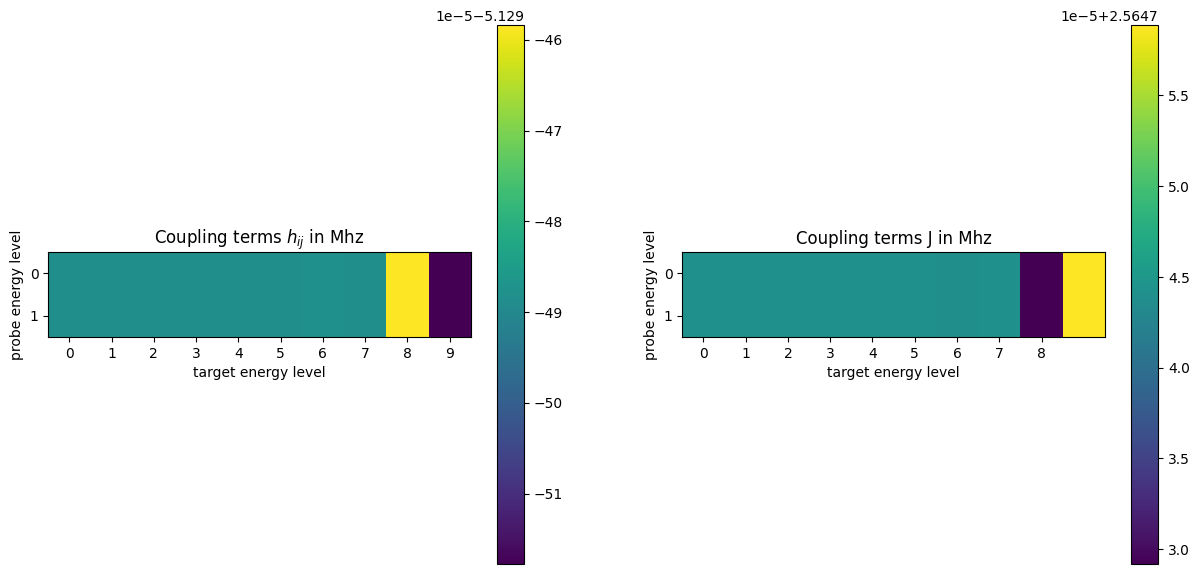

2.5647440350343205

In [7]:
# Initialize transmon

# Circuit constant
ng = 0.5
Cc1 = 18e-15
Cc2 = 18e-15

Ej_p = 18.2e9
Ej_t = 11.8e9
Cp = 270e-15
Ct = 250e-15
ncut_p = 10
ncut_t = 10

L_res = 4.3e-9
C_res = 90e-15
m_cut = 10

# Creation of circuit object
system_2= circuit_res([Cc1, Cc2], C_res, L_res, m_cut, [qubit(Ej_p, [Cp], ng, ncut_p), qubit(Ej_t, [Ct], 0.5, ncut_t)])

system_2.print_params()

J_matrix = system_2.get_J()
print(J_matrix.shape)
print(J_matrix * 1e-9 / constants.hbar)

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Coupling terms $h_{ij}$ in Mhz')
im1 = ax1.imshow(-2* np.real(J_matrix[:,0:10]) * 1e-6 / constants.h, cmap=plt.get_cmap(thememap))
ax1.set_xticks(np.arange(0, 10, 1))
ax1.set_xlabel('target energy level')
ax1.set_yticks(np.arange(0, 2, 1))
ax1.set_ylabel('probe energy level')
f.colorbar(im1)

ax2 = f.add_subplot(122)
ax2.title.set_text('Coupling terms J in Mhz')
im2 = ax2.imshow(np.real(J_matrix[:,0:10]) * 1e-6 / constants.h, cmap=plt.get_cmap(thememap))
ax2.set_xticks(np.arange(0, 9, 1))
ax2.set_xlabel('target energy level')
ax2.set_ylabel('probe energy level')
ax2.set_yticks(np.arange(0, 2, 1))
f.colorbar(im2)

plt.show()

np.mean(np.real(J_matrix[:,0:5]) * 1e-6 / constants.h)



### 2.2 Coupling regarding defining parameters

Probe ------------------
Ej:    18.200000000000003 GHz
Ec:    0.2869663603653203 GHz
Cj:    270.0 fF
Ej/Ec : 63.42206792751119
w_01:    6.167224042050487 GHz
ng:    0.5
Target ------------------
Ej:    11.799999999999999 GHz
Ec:    0.309923669194546 GHz
Cj:    250.0 fF
Ej/Ec : 38.073891002474156
w_01:    5.078165032309918 GHz
ng:    0.5
Resonator ------------------
wr:    8.090300427627033 Ghz
Cc1:    18.0 fF
Cc2:    18.0 fF
Cr:    90.0 fF
Lr:    4.3 nH
Z0:    218.5812841434 Ohm


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 500/500 [02:26<00:00,  3.41it/s]


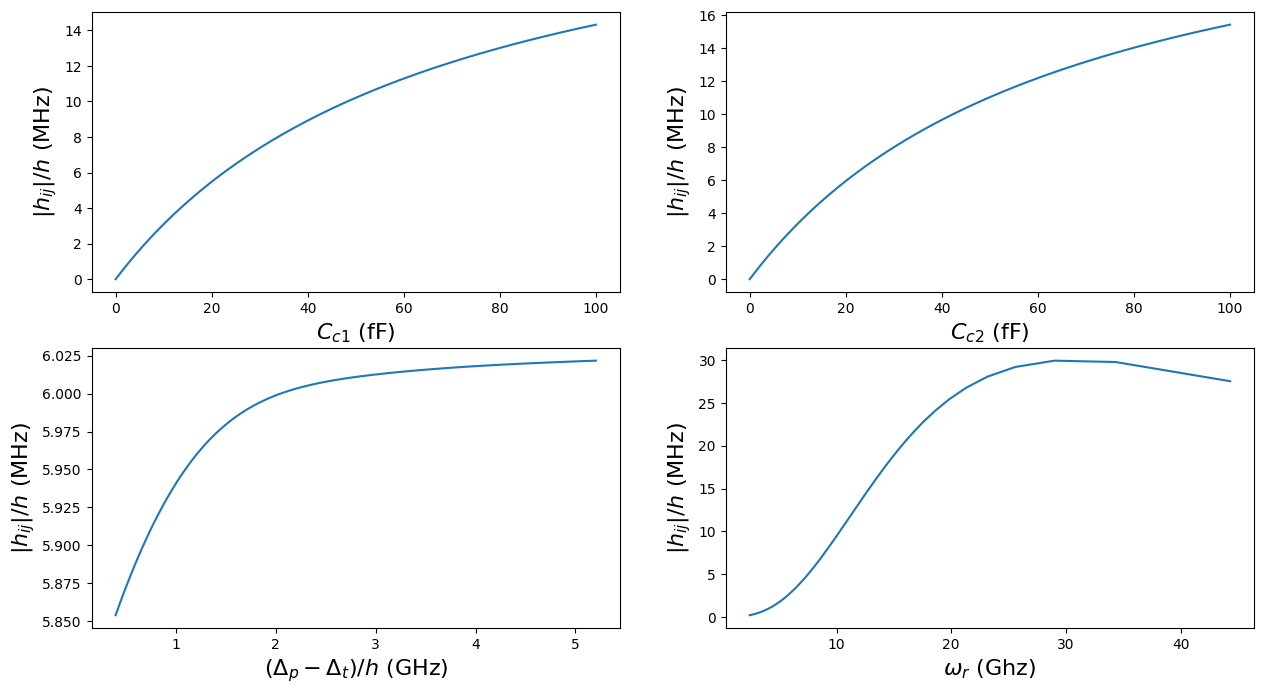

In [8]:
# Circuit constant

ng = 0.5
Cc1 = 18e-15
Cc2 = 18e-15

Ej_p = 18.2e9
Ej_t = 11.8e9
Cp = 270e-15
Ct = 250e-15
ncut_p = 5
ncut_t = 5

L_res = 4.3e-9
C_res = 90e-15
m_cut = 5



# Creation of circuit object
system_3= circuit_res([Cc1, Cc2], C_res, L_res, m_cut, [qubit(Ej_p, [Cp], ng, ncut_p), qubit(Ej_t, [Ct], 0.5, ncut_t)])

system_3.print_params()

Ccs_1 = np.linspace(0, 10e-14, 50)

fig_data_1 = []

for Cc in tqdm(Ccs_1):
    system_3.Cc1 = Cc

    # Full Hamiltonina Approach
    J_matrix = system_3.get_J(update=True)
    fig_data_1.append(J_matrix)

Ccs_2 = np.linspace(0, 10e-14, 50)
system_3.Cc1 = 20e-15
fig_data_2 = []

for Cc in tqdm(Ccs_2):
    system_3.Cc2 = Cc

    # Full Hamiltonina Approach
    J_matrix = system_3.get_J(update=True)
    fig_data_2.append(J_matrix)

# fig_pt_detuning_Ejt = np.linspace(8.5e9, 27e9, 20)
fig_data_Ejt = np.linspace(1e9, 15e9, 100)
system_3.Cc2 = 20e-15
fig_data_3 = []
fig_data_detuning = []

for Ejt in tqdm(fig_data_Ejt):
    system_3.target.Ej = Ejt * h

    # Full Hamiltonina Approach
    g = 2 * np.mean(np.real(system_3.get_J(update=True)))
    fig_data_3.append(g)
    
    detunning = system_3.get_detuning_pt(update=True)
    fig_data_detuning.append(detunning)

Ccr = np.linspace(100e-14, 30e-16, 500)
system_3.target.Ej = 11.8e9 * h

fig_data_4 = []

for Cc in tqdm(Ccr):
    system_3.res_Cr = Cc

    # Full Hamiltonina Approach
    J_matrix = system_3.get_J(update=True)
    fig_data_4.append(J_matrix)


with plt.style.context([]):

    pparam = dict(xlabel='$C_{c1}$ (fF)', ylabel='$| h_{ij} | / h$ (MHz)')

    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(221)
    ax1.plot([val * 1e15 for val in Ccs_1], [2 * np.mean(np.real(J_matrix)) * 1e-6 / h for J_matrix in fig_data_1])
    ax1.set(**pparam)
    ax1.xaxis.label.set_size(16)
    ax1.yaxis.label.set_size(16)

    pparam = dict(xlabel='$C_{c2}$ (fF)', ylabel='$| h_{ij} | / h$ (MHz)')

    ax2 = fig.add_subplot(222)
    ax2.plot([val * 1e15 for val in Ccs_2], [2 * np.mean(np.real(J_matrix)) * 1e-6 / h for J_matrix in fig_data_2])
    ax2.set(**pparam)
    ax2.xaxis.label.set_size(16)
    ax2.yaxis.label.set_size(16)

    pparam = dict(xlabel='$(\\Delta_p - \\Delta_t) / h$ (GHz)', ylabel='$| h_{ij} | / h$ (MHz)')
    
    ax3 = fig.add_subplot(223)
    ax3.plot([fig_data_detuning[idx] * 1e-9 / h for idx in range(len(fig_data_Ejt))], [np.abs(g) * 1e-6 / h for g in fig_data_3])
    ax3.set(**pparam)
    ax3.xaxis.label.set_size(16)
    ax3.yaxis.label.set_size(16)

    pparam = dict(xlabel='$\omega_{r}$ (Ghz)', ylabel='$| h_{ij} | / h$ (MHz)')

    ax4 = fig.add_subplot(224)
    ax4.plot([(constants.hbar / np.sqrt(system_3.res_Lr * val)) / constants.h * 1e-9 for val in Ccr], [2 * np.mean(np.real(J_matrix)) * 1e-6 / h for J_matrix in fig_data_4])
    ax4.set(**pparam)
    ax4.xaxis.label.set_size(16)
    ax4.yaxis.label.set_size(16)
  
    plt.show()

Another thing to look at is trying to replicate the result from pechal2022. They are calculating a forth order coupling between two transmon coupled via a flux qubit coupler. The coupler in this paper is then a anharmonic microwave cavity but it is possible to translate the result in our circuit. Considering the coupling as an harmonic oscillator and looking at their formula for the forth order coupling it is possible to evaluate it a compare it to the coupling we have been studied to see which one is dominant. Their coupling takes the form of the following J element:

\begin{equation}
    J = 2g_{12}^2p_{12}^2\frac{\alpha_1\alpha_2(\Delta_1 +\Delta_2)^2+\alpha_1\Delta_1^2(\Delta_1+\Delta_2)+\alpha_2\Delta_2^2(\Delta_1+\Delta_2)}{\Delta_1^2\Delta_2^2(\Delta_1+\Delta_2)(\Delta_2-\Delta_1)(\Delta_1-\Delta_2)}
\end{equation}

Where $\Delta_{1,2} = \omega_r -\omega_{1,2}$ is the detuning of each transmon to the coupler. 

Probe ------------------
Ej:    18.200000000000003 GHz
Ec:    0.2869663603653203 GHz
Cj:    270.0 fF
Ej/Ec : 63.42206792751119
w_01:    6.167224042050487 GHz
ng:    0.5
Target ------------------
Ej:    11.799999999999999 GHz
Ec:    0.309923669194546 GHz
Cj:    250.0 fF
Ej/Ec : 38.073891002474156
w_01:    5.078165032309918 GHz
ng:    0.5
wr:    8.090300427627033 Ghz
Cc1:    18.0 fF
Cc2:    18.0 fF
Cr:    90.0 fF
Lr:    4.3 nH
Z0:    218.5812841434 Ohm


  0%|          | 0/300 [00:00<?, ?it/s]

100%|██████████| 300/300 [01:26<00:00,  3.47it/s]


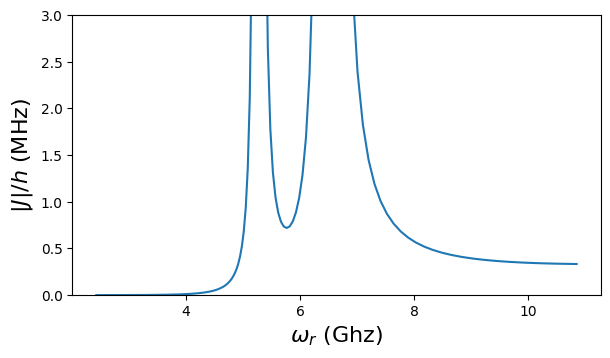

In [9]:
# Circuit constant

ng = 0.5
Cc1 = 18e-15
Cc2 = 18e-15

Ej_p = 18.2e9
Ej_t = 11.8e9
Cp = 270e-15
Ct = 250e-15
ncut_p = 5
ncut_t = 5

L_res = 4.3e-9
C_res = 90e-15
m_cut = 5



# Creation of circuit object
system_3= circuit_res([Cc1, Cc2], C_res, L_res, m_cut, [qubit(Ej_p, [Cp], ng, ncut_p), qubit(Ej_t, [Ct], 0.5, ncut_t)])

system_3.print_params()

# Ccs_1 = np.linspace(0, 10e-14, 50)

# fig_data_1 = []

# for Cc in tqdm(Ccs_1):
#     system_3.Cc1 = Cc

#     # Full Hamiltonina Approach
#     J_matrix = system_3.get_J(update=True)
#     fig_data_1.append(J_matrix)

# Ccs_2 = np.linspace(0, 10e-14, 50)
# system_3.Cc1 = 20e-15
# fig_data_2 = []

# for Cc in tqdm(Ccs_2):
#     system_3.Cc2 = Cc

#     # Full Hamiltonina Approach
#     J_matrix = system_3.get_J(update=True)
#     fig_data_2.append(J_matrix)

# # fig_pt_detuning_Ejt = np.linspace(8.5e9, 27e9, 20)
# fig_data_Ejt = np.linspace(1e9, 15e9, 100)
# system_3.Cc2 = 20e-15
# fig_data_3 = []
# fig_data_detuning = []

# for Ejt in tqdm(fig_data_Ejt):
#     system_3.target.Ej = Ejt * h

#     # Full Hamiltonina Approach
#     g = 2 * np.mean(np.real(system_3.get_J(update=True)))
#     fig_data_3.append(g)
    
#     detunning = system_3.get_detuning_pt(update=True)
#     fig_data_detuning.append(detunning)

Ccr = np.linspace(100e-14, 50e-15, 300)
system_3.target.Ej = 11.8e9 * h

fig_data_4 = []

for Cc in tqdm(Ccr):
    system_3.res_Cr = Cc

    # Full Hamiltonina Approach
    J_matrix = system_3.get_J_forth(update=True)
    fig_data_4.append(J_matrix)


with plt.style.context([]):

    # pparam = dict(xlabel='$C_{c1}$ (fF)', ylabel='$| h_{ij} | / h$ (MHz)')

    fig = plt.figure(figsize=(15,8))
    # ax1 = fig.add_subplot(221)
    # ax1.plot([val * 1e15 for val in Ccs_1], [2 * np.mean(np.real(J_matrix)) * 1e-6 / h for J_matrix in fig_data_1])
    # ax1.set(**pparam)
    # ax1.xaxis.label.set_size(16)
    # ax1.yaxis.label.set_size(16)

    # pparam = dict(xlabel='$C_{c2}$ (fF)', ylabel='$| h_{ij} | / h$ (MHz)')

    # ax2 = fig.add_subplot(222)
    # ax2.plot([val * 1e15 for val in Ccs_2], [2 * np.mean(np.real(J_matrix)) * 1e-6 / h for J_matrix in fig_data_2])
    # ax2.set(**pparam)
    # ax2.xaxis.label.set_size(16)
    # ax2.yaxis.label.set_size(16)

    # pparam = dict(xlabel='$(\\Delta_p - \\Delta_t) / h$ (GHz)', ylabel='$| h_{ij} | / h$ (MHz)')
    
    # ax3 = fig.add_subplot(223)
    # ax3.plot([fig_data_detuning[idx] * 1e-9 / h for idx in range(len(fig_data_Ejt))], [np.abs(g) * 1e-6 / h for g in fig_data_3])
    # ax3.set(**pparam)
    # ax3.xaxis.label.set_size(16)
    # ax3.yaxis.label.set_size(16)

    pparam = dict(xlabel='$\omega_{r}$ (Ghz)', ylabel='$|J | / h$ (MHz)')

    ax4 = fig.add_subplot(221)
    ax4.plot([(constants.hbar / np.sqrt(system_3.res_Lr * val)) / constants.h * 1e-9 for val in Ccr], [2 * np.mean(np.abs(J_matrix)) * 1e-6 / h for J_matrix in fig_data_4])
    ax4.set(**pparam)
    ax4.set_ylim([0, 3])
    ax4.xaxis.label.set_size(16)
    ax4.yaxis.label.set_size(16)
  
    plt.show()